In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mysql-connector-python

     |████████████████████████████████| 372 kB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import mysql.connector
import os

In [15]:
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv','orders'),
    ('sellers.csv','sellers'),
    ('products.csv','products'),
    ('geolocation.csv','geolocation'),
    ('payments.csv','payments'),
    ('order_items.csv','order_items'),
]

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Aayush@26',
    database='Target'
)    
cursor = conn.cursor()

folder_path = '/Users/aayushamrute/Desktop/Target'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    df = pd.read_csv(file_path)
    
    df = df.where(pd.notnull(df),None)
    
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")
    
    df.columns = [col.replace(' ','_').replace('-','_').replace('-','_') for col in df.columns]
    
    
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)
    
    for _, row in df.iterrows():
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)
        
    conn.commit()
    
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [16]:
import os

file_path = '/Users/aayushamrute/Desktop/Target/customers.csv'
print(os.path.exists(file_path))

True


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "Aayush@26",
                            database = "Target")

cur = db.cursor()

In [19]:
# 1) List all unique cities where customers are located

query = """ select distinct customer_city from customers """ 
cur.execute(query)
data = cur.fetchall()
data

[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [26]:
# 2) Count the number of orders placed in 2017

query = """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017""" 
cur.execute(query)
data = cur.fetchall()
print("Total orders placed in 2017 are",data[0][0])

Total orders placed in 2017 are 45101


In [38]:
query = """
    SELECT products.product_category AS category,
           ROUND(SUM(payments.payment_value),1) AS sales
    FROM products 
    JOIN order_items ON products.product_id = order_items.product_id
    JOIN payments ON order_items.order_id = payments.order_id
    GROUP BY products.product_category;
"""

cur.execute(query)
data = cur.fetchall()
data

[('perfumery', 506738.7),
 ('Furniture Decoration', 1430176.4),
 ('telephony', 486882.1),
 ('bed table bath', 1712553.7),
 ('automotive', 852294.3),
 ('computer accessories', 1585330.4),
 ('housewares', 1094758.1),
 ('babies', 539845.7),
 ('toys', 619037.7),
 ('Furniture office', 646826.5),
 ('Cool Stuff', 779698.0),
 ('HEALTH BEAUTY', 1657373.1),
 ('pet Shop', 311269.0),
 ('General Interest Books', 64694.8),
 ('stationary store', 317440.1),
 ('Watches present', 1429216.7),
 ('PCs', 279121.5),
 ('climatization', 91170.7),
 ('Construction Tools Construction', 241475.6),
 ('sport leisure', 1392127.6),
 ('Bags Accessories', 187151.3),
 ('electronics', 259857.1),
 ('Casa Construcao', 136645.3),
 ('Games consoles', 195480.4),
 ('Fashion Bags and Accessories', 218158.3),
 ('home appliances', 95532.3),
 ('Garden tools', 838280.8),
 ('Agro Industria e Comercio', 118730.6),
 (None, 252801.7),
 ('audio', 60324.6),
 ('technical books', 24915.4),
 ('Construction Tools Garden', 42394.4),
 ('Market 

In [44]:
# 4) Calculate Percentage of orders that were paid in installments.

query = """ select (sum(case when payment_installments >= 1 then 1
else 0 end)/count(*))*100 from payments
"""

cur.execute(query)
data = cur.fetchall()
print("The percentage of orders that were paid in installments is", data[0][0])


The percentage of orders that were paid in installments is 99.9981


<function matplotlib.pyplot.show(close=None, block=None)>

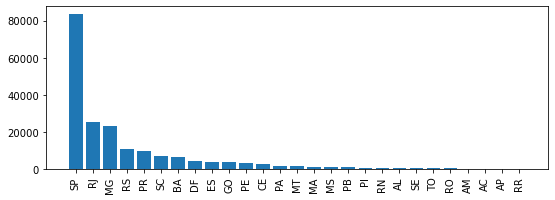

In [60]:
# 5) Number of customers from each state

query = """ select customer_state, count(customer_id) from customers
group by customer_state
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["State", "Customer_Count"])
df = df.sort_values(by = "Customer_Count", ascending = False)

plt.figure(figsize = (9,3))
plt.bar(df["State"], df["Customer_Count"])
plt.xticks(rotation = 90)
plt.show

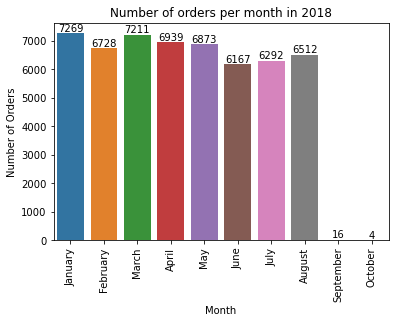

In [72]:
# 6) Calculate the number of orders per month in 2018.

query = """ select monthname(order_purchase_timestamp) AS months, count(order_id) AS order_count
from orders
where year(order_purchase_timestamp) = 2018
group by months
"""

cur.execute(query)
data = cur.fetchall()

df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ["January","February","March","April","May","June","July","August","September","October"]

ax = sns.barplot(x = df["months"], y = df["order_count"], data = df, order = o)
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.title("Number of orders per month in 2018")
plt.show()

In [84]:
# 7) Find average number of products per order, grouped by customer_city
query = """ 
with count_per_order AS 
(select orders.order_id, orders.customer_id, count(order_items.order_id) AS oc
from orders
join order_items ON 
orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) AS average_orders
from customers
join count_per_order on
customers.customer_id = count_per_order.customer_id
group by customers.customer_city
order by average_orders DESC
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer_city", "average_products_per_orders"])
df.head(10)


,customer_city,average_products_per_orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,curralinho,4.00
7,picarra,4.00
8,morro de sao paulo,4.00
9,teixeira soares,4.00


In [94]:
# 8) Calculate the percentage of total revenue contributed by each product category

query = """
  SELECT products.product_category AS category,
       ROUND((SUM(payments.payment_value) / (SELECT SUM(payment_value) FROM payments)) * 100, 2) AS sales_percentage
FROM products 
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON order_items.order_id = payments.order_id
GROUP BY products.product_category
ORDER BY sales_percentage DESC;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["category", "Percentage_Distribution"])
df.head(10)


,category,Percentage_Distribution
0,bed table bath,10.70
1,HEALTH BEAUTY,10.35
2,computer accessories,9.90
3,Furniture Decoration,8.93
4,Watches present,8.93
5,sport leisure,8.70
6,housewares,6.84
7,automotive,5.32
8,Garden tools,5.24
9,Cool Stuff,4.87


In [103]:
# 9) Identidy the correlation between product price and number of times a product has been purchased

import numpy as np
query = """
SELECT products.product_category, 
COUNT(order_items.product_id) AS Order_count,
ROUND(AVG(order_items.price),2) AS Average_Price
FROM products
JOIN order_items ON 
products.product_id = order_items.product_id
GROUP BY products.product_category;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["category", "Order_Count","Average_Price"])
df.head(10)

arr1 = df["Order_Count"]
arr2 = df["Average_Price"]

a = np.corrcoef([arr1,arr2])
print("The Correlation between price and number of times a product has been purchased is",a[0][-1])

The Correlation between price and number of times a product has been purchased is -0.10631514167157562


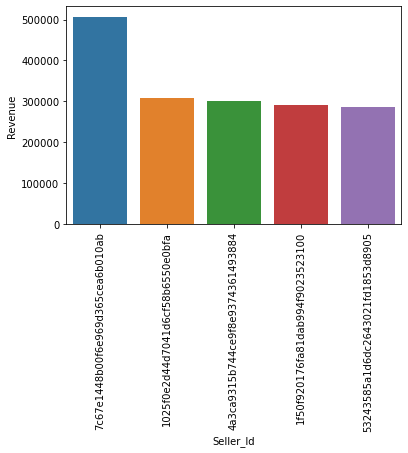

In [114]:
# 10) Calculate the total revenue generated by each seller, and rank them by revenue 

query = """
SELECT seller_id, total_revenue,
       DENSE_RANK() OVER (ORDER BY total_revenue DESC) AS rn
FROM (
    SELECT order_items.seller_id,
           SUM(payments.payment_value) AS total_revenue
    FROM order_items
    JOIN payments ON order_items.order_id = payments.order_id
    GROUP BY order_items.seller_id
) AS revenue_summary
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["Seller_Id","Revenue","Rank"])
df = df.head()

sns.barplot(x="Seller_Id",y="Revenue", data=df)
plt.xticks(rotation = 90)
plt.show()

In [125]:
# 11) Calculate the moving average of order values for each customer over their order history.
query = """
SELECT customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id
ORDER BY order_purchase_timestamp
rows between 2 preceding and current row) AS mov_avg
FROM 
(SELECT orders.customer_id, orders.order_purchase_timestamp,
payments.payment_value AS payment
FROM payments
JOIN orders ON 
payments.order_id = orders.order_id) AS a;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["customer_id","order_purchase_timestamp","payment","mov_avg"])
df = df.head(5)
df



,customer_id,order_purchase_timestamp,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002


In [128]:
# 12) Calculate cumulative sales per month for each year

query = """
SELECT years, months, payment, SUM(payment)
over(
ORDER BY years, months) cumulative_sales 
FROM (
SELECT year(orders.order_purchase_timestamp) AS years,
month(orders.order_purchase_timestamp) AS months,
ROUND(SUM(payments.payment_value),2) AS payment 
FROM orders
JOIN payments ON 
orders.order_id = payments.order_id
GROUP BY years, months
ORDER BY years, months) AS a;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df = df.head()
df


,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39


In [129]:
# 13) Calculate year over year growth of total sales

query = """
with a AS (SELECT year(orders.order_purchase_timestamp) AS years,
ROUND(SUM(payments.payment_value),2) AS payment 
FROM orders
JOIN payments ON 
orders.order_id = payments.order_id
GROUP BY years
ORDER BY years)

SELECT years, ((payment - lag(payment,1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 
FROM a
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","yoy% growth"])
df

,years,yoy% growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


In [130]:
#14) Calculate the retentation rate of customers, defined as percentage of customers who make their purchase within 6 months of their first purchase 
query = """
WITH a AS (
    SELECT customers.customer_id, MIN(orders.order_purchase_timestamp) AS first_order
    FROM customers
    JOIN orders ON customers.customer_id = orders.customer_id
    GROUP BY customers.customer_id
),
b AS (
    SELECT a.customer_id, COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order
    FROM a
    JOIN orders ON orders.customer_id = a.customer_id
    AND orders.order_purchase_timestamp > a.first_order
    AND orders.order_purchase_timestamp < DATE_ADD(a.first_order, INTERVAL 26 MONTH)
    GROUP BY a.customer_id
)
SELECT 100 * (COUNT(DISTINCT a.customer_id) / COUNT(DISTINCT b.customer_id))
FROM a
LEFT JOIN b ON a.customer_id = b.customer_id;
"""

cur.execute(query)
data = cur.fetchall()
data

[(None,)]

<function matplotlib.pyplot.show(close=None, block=None)>

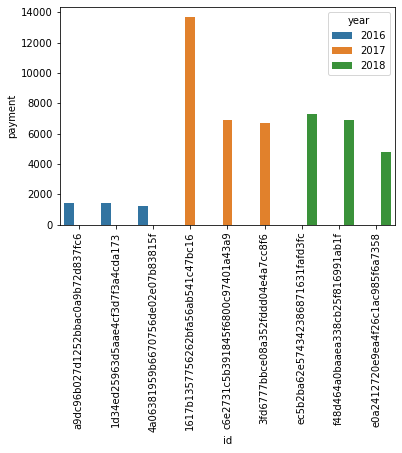

In [133]:
#15) IDentify TOP 3 customers who spent most money in each year.

query = """
SELECT years, customer_id, payment, d_rank
FROM (
	SELECT year(orders.order_purchase_timestamp) AS years,
    orders.customer_id,
    SUM(payments.payment_value) AS payment,
    dense_rank() over(partition by year(orders.order_purchase_timestamp)
    ORDER BY SUM(payments.payment_value) DESC) AS d_rank
    FROM orders
    JOIN payments ON 
    payments.order_id = orders.order_id
    GROUP BY year(orders.order_purchase_timestamp),
    orders.customer_id) AS a
    WHERE d_rank <= 3;
"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["year","id", "payment","rank"])
df
sns.barplot(x = "id", y = "payment", data = df, hue = "year")
plt.xticks(rotation = 90)
plt.show